# M.A.D. Linear Algebra: Foundations

<span style="color:red;">**M.A.D.** => **M**achine **L**earning and **D**ata Science<span>

**Purpose:** The purpose of this workbook is to help you get comfortable with the topics outlined below.

**Prereqs**
* `numpy` is used throughout this workbook (checkout my Numpy Workbook if you need to brush up)
* `matplotlib` is used throughout this workbook (checkout my Matplotlib Workbook if you need to brush up)
    
**Recomended Usage**
* Run each of the cells (Shift+Enter) and edit them as necessary to solidify your understanding
* Do any of the exercises that are relevant to helping you understand the material

**Topics Covered**
* Representing Problems and Data with Matrices
* Linear Algebra Fundamentals (linearity, matrix math, transpose, identity, determinant, etc)
* Computational Linear Algebra Considerations
* Practical Applications in Data Science (dimensionality reduction, ...)

# Workbook Setup

## Troubleshooting Tips

If you run into issues running any of the code in this notebook, check your version of Jupyter, extensions, etc.

```bash
!jupyter --version

jupyter core     : 4.6.1
jupyter-notebook : 6.0.2
qtconsole        : not installed
ipython          : 7.9.0
ipykernel        : 5.1.3
jupyter client   : 5.3.4
jupyter lab      : 1.2.3
nbconvert        : 5.6.1
ipywidgets       : not installed
nbformat         : 4.4.0
traitlets        : 4.3.3
```

```bash
!jupyter-labextension list

JupyterLab v1.2.3
Known labextensions:
   app dir: /usr/local/share/jupyter/lab
        @aquirdturtle/collapsible_headings v0.5.0  enabled  OK
        @jupyter-widgets/jupyterlab-manager v1.1.0  enabled  OK
        @jupyterlab/git v0.8.2  enabled  OK
        @jupyterlab/github v1.0.1  enabled  OK
        jupyterlab-flake8 v0.4.0  enabled  OK

Uninstalled core extensions:
    @jupyterlab/github
    jupyterlab-flake8
```

In [1]:
# Run this cell to check the version of Jupyter you are running
#!jupyter --version

In [2]:
# Run one of these cells to check what extensions you are using
#!jupyter-labextension list
#!jupyter-nbextension list

## Notebook Configs

In [2]:
# AUTO GENERATED CELL FOR NOTEBOOK SETUP

# NOTEBOOK WIDE MAGICS

# Reload all modules before executing a new line
%load_ext autoreload
%autoreload 2

# Abide by PEP8 code style
# %load_ext pycodestyle_magic
# %pycodestyle_on

# LIBRARY SPECIFIC MAGICS - UNCOMMENT AS NEEDED

# Plot all matplotlib plots in output cell and save on close
%matplotlib inline

In [3]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from IPython.display import YouTubeVideo

In [3]:
def print_a(a):
    print('Dim: {}\nShape: {}\n{}'.format(a.ndim, a.shape, a))

In [4]:
def plot_2d_vectors(vectors=None, labels=None, colors=None, title=None):
    '''A custom vector plotting function that makes it easy to plot 2D vectors'''

    # TODO ADD KWARGS THAT CAN BE PASSED INTO THE SET FUNCTION

    # TODO input data checks
    # type(vectors) -> list of int tuple
    # type(vector_labels) -> list of strings
    # len(vectors) == len(vector_labels)
    # title == None | string
    # etc
    
    fig, ax = plt.subplots(1)

    origin = [0], [0]
    xmin, xmax = 0, 0
    ymin, ymax = 0, 0

    if colors == None:
        color_list = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        colors = np.random.choice(color_list, len(vectors))

    if labels == None:
        labels = ['V'+str(i) for i in range(len(vectors))]

    for i in range(len(vectors)):
        ax.quiver(*origin, *vectors[i], color=colors[i], label=labels[i], units='xy', scale=1)

        if vectors[i][0] < xmin:
            xmin = vectors[i][0]
        elif vectors[i][0] > xmax:
            xmax = vectors[i][0]

        if vectors[i][1] < ymin:
            ymin = vectors[i][1]
        elif vectors[i][1] > ymax:
            ymax = vectors[i][1]

    buffer = 2
    plt.xlim(xmin - buffer, xmax + buffer)
    plt.ylim(ymin - buffer, ymax + buffer)

    plt.grid()

    if title != None:
        plt.title(title)

    plt.legend()

In [5]:
def plot_3d_vectors(vectors=None, labels=None, colors=None, title=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    origin = [0], [0], [0]
    xmin, xmax = 0, 0
    ymin, ymax = 0, 0
    zmin, zmax = 0, 0

    if colors == None:
        color_list = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        colors = np.random.choice(color_list, len(vectors))

    if labels == None:
        labels = ['V'+str(i) for i in range(len(vectors))]

    for i in range(len(vectors)):
        ax.quiver3D(*origin, *vectors[i], color=colors[i], label=labels[i])

        if vectors[i][0] < xmin:
            xmin = vectors[i][0]
        elif vectors[i][0] > xmax:
            xmax = vectors[i][0]

        if vectors[i][1] < ymin:
            ymin = vectors[i][1]
        elif vectors[i][1] > ymax:
            ymax = vectors[i][1]

        if vectors[i][2] < zmin:
            zmin = vectors[i][2]
        elif vectors[i][2] > zmax:
            zmax = vectors[i][2]

    print('xlim: {}, {}'.format(xmin, xmax))
    print('ylim: {}, {}'.format(ymin, ymax))
    print('zlim: {}, {}'.format(zmin, zmax))

    buffer = 2
    ax.set_xlim([xmin - buffer, xmax + buffer])
    ax.set_ylim([ymin - buffer, ymax + buffer])
    ax.set_zlim([zmin - buffer, zmax + buffer])
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    plt.grid()

    if title != None:
        plt.title(title)

    plt.legend()

# Representing Problems and Data with Matrices

Matrices are a really convenient way to represent many kinds of problems like graphs, pictures, dynamic fluids problems, and so many more.

## Learning Materials

Watch the video below to understand the concepts then do the exercises that follow.

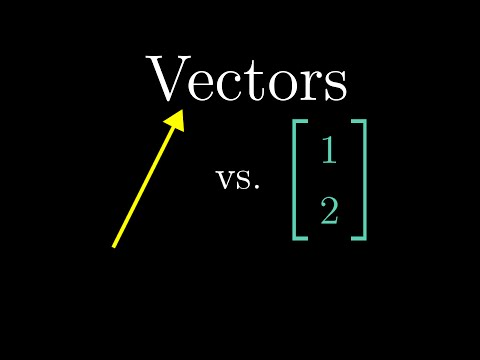

In [5]:
# Vector representations of data
YouTubeVideo("fNk_zzaMoSs", width=600, height=350, start=0)

### Key Points from the Video
* vectors
* scalars
* vector representations of data
* vector addition
* scalar multiplication

### Common Confusion Points

<img width="300" src="img/scalar-vector-matrix.svg"></img>

**Scalar vs Vector**

A *scalar* is just a magnitude (or value). It has no direction associated with it.

A *vector* has both a magnitude and direction.

**Vector vs Matrix vs Tensor**

All of these words are used to represent multidimensional data

A *matrix* is a grid of n × m numbers surrounded by brackets

A *vector* is a matrix with just one row or column

A *tensor* is a term used to describe a generalized matrix
- Rank 0 Tensor: has a magnitude and no direction (also called a scalar)
- Rank 1 Tensor: has a magnitude and 1 direction (also called a vector)
- Rank 2 Tensor: has a magnitude and 2 directions

## Applications and Examples

### Networks as Matrices

Networks (frequently called graphs) can be represented using matrices. There are several ways to encode a graph to a matrix, here are some common ones.

#### Adjacency Matrix

An **adjacency matrix** is a square matrix used to a finite graph like this one:

![adjancy_matrix](img/adj_matrix.gif)

[Source](http://mathworld.wolfram.com/AdjacencyMatrix.html)

The elements of the matrix indicate whether pairs of vertices are adjacent (connected) or not in the graph. Prove to yourself that these matrices represent the connected edges ("edges" are what we call the lines) of the graph.

We can do this in explore it in too using the networkx package.

In [14]:
import networkx as nx

In [15]:
M1 = np.array([[0, 0, 0, 1],
               [0, 0, 0, 1],
               [0, 0, 0, 1],
               [1, 1, 1, 0]])

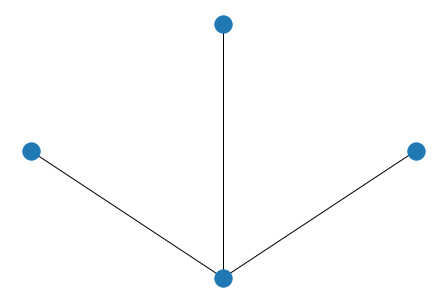

In [16]:
graph = nx.from_numpy_matrix(M1)
nx.draw_circular(graph)

We can also represent weighted graphs and directional graphs using matricies. Feel free to google around and explore these encodings on your own.

#### Laplacian Matrix

The Laplacian Matrix is another popular matrix representation of a graph. It is the degree matrix minus the adjacency matrix:

<img src="img/laplacian.png" width="600" ></img>

[Source](https://en.wikipedia.org/wiki/Laplacian_matrix)

When a graph is represented like this we can extract many useful properties of the graph like the sparsest cuts, non-cyclic, subsets and more.

### Neural Networks

A neural network is also built from a combination of multiple matrices.

Normally, we see neural networks drawn like the image below. They consist of an input layer, some number of hidden layers, and an output layer (the degree of connectivity between nodes can vary).

<img width="400" src="img/ann.png"></img>

[Source](https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6)

If we take a deeper look at the network, we see that the input layer is a matrix of input data. 

For this example lets say its a greyscale image that is 28x28 pixels that we flatten into a 784x1 array to feed into the network. Let's learn the steps through the one foward pass of a fully connected network:

<img src="img/9.png" width="300"/>

**Data comes in...**

Input data shape: 784 x 1

$layer_1 => i^0 = [i_0 ... i_n]$

**Data flows forward to the first hidden layer...**

$layer_2 => a^{(0)} = \sigma (w_0 a_0 + ... + w_n a_n)$

**Data flows forward to the $\mathbf n^{th}$ hidden layer...**


**Data comes out in one of 10**

The the input data is weighted (each connection or edge of the network is weighted, multiplied by the activation  )Then each hidden layer that follows are activation nodes. The data runs through the network ...

<img src="img/network_matrix.png" width="300" />

<div>
    <img src="img/matrix_network_3blue1brown.png" alt="Network Matrix Representation" title="Matrix Network Representation" width="60%" height="60%" />
    <figcaption>
        <a href="https://www.youtube.com/watch?v=aircAruvnKk">3Blue1Brown</a>
    </figcaption>
</div>

## Videos and Images as Matrices

Videos are just made up of multiple frames of images. An image and anything we can represent as an image is just a 3D matrix: `l x w x color`

In [215]:
import matplotlib.image as mpimg

Image Shape: (681, 1024, 3)
[[[0.3647059  0.34117648 0.1254902 ]
  [0.3764706  0.34509805 0.1254902 ]
  [0.39215687 0.36078432 0.13725491]
  ...
  [0.22352941 0.21176471 0.05882353]
  [0.21960784 0.20392157 0.04705882]
  [0.21568628 0.2        0.04313726]]

 [[0.36862746 0.34117648 0.1254902 ]
  [0.38431373 0.34901962 0.1254902 ]
  [0.39607844 0.35686275 0.13333334]
  ...
  [0.21960784 0.21176471 0.05490196]
  [0.22352941 0.21176471 0.04705882]
  [0.22352941 0.20784314 0.04313726]]

 [[0.37254903 0.34901962 0.12941177]
  [0.3764706  0.34509805 0.12156863]
  [0.38039216 0.34901962 0.1254902 ]
  ...
  [0.22352941 0.21176471 0.05882353]
  [0.22352941 0.21176471 0.04313726]
  [0.22745098 0.20784314 0.04313726]]

 ...

 [[0.654902   0.50980395 0.3882353 ]
  [0.6666667  0.5176471  0.36862746]
  [0.65882355 0.5019608  0.34901962]
  ...
  [0.54509807 0.41960785 0.1764706 ]
  [0.56078434 0.43529412 0.18039216]
  [0.5764706  0.44705883 0.2       ]]

 [[0.7137255  0.5647059  0.42745098]
  [0.7254

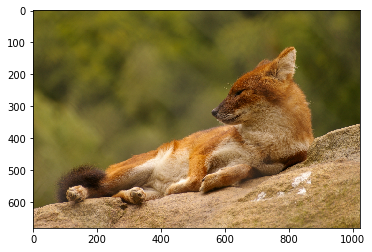

In [217]:
img_fox = mpimg.imread('img/fox.png')
print('Image Shape: {}'.format(img_fox.shape))
print(img_fox)

print(img_fox[0])
plt.imshow(img_fox)

Images as matrices extends to sound, feel and other things as matrices also. If there is a time component then we can think of each matrix representing the data at a particular time. 

If we can draw sound as an image (like below) it follows that we can use matrices to represent a multitude of things.

<img src="img/sound_image.png" width="600"></img>

[Source](https://towardsdatascience.com/sound-classification-using-images-68d4770df426)

## Systems of Motion as Matrices

Physical system like fluid flow, motion, and more can also be represented using matrices.

Say we want to describe motion along two lines using the equations $-2x + 3y$ and $3x - 6y$. We can represent the system of equations as a matrix ${\displaystyle M ={\begin{pmatrix}-2&3\\3&-6\end{pmatrix}}}$

https://www.mathsisfun.com/algebra/systems-linear-equations.html

# Linear Algebra Fundamentals

The fundamentals of working with systems of linear equations and their properties

## A Review of Vectors

* vectors and scalars
* vector representations of data
* vector addition
* scalar multiplication

### Learning Material

### Applications and Examples

Create this vector in numpy, show its dimension and shape, plot the row vectors.

$$
{\displaystyle \mathbf {A} ={\begin{pmatrix}1&3\\2&-2\end{pmatrix}}}
$$

In [164]:
A = np.array([[1, 3],
              [2, -2]])
print(A)
print(A.ndim)
print(A.shape)

[[ 1  3]
 [ 2 -2]]
2
(2, 2)


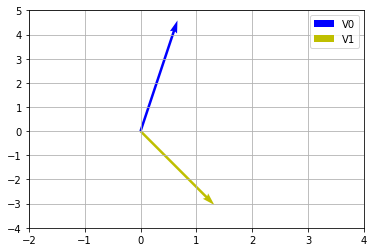

In [165]:
plot_2d_vectors(A)

Multiply the matrix by any scalar, see how it scales the vector.

$$
{\displaystyle cA =c{\begin{pmatrix}1&3\\2&-2\end{pmatrix}}={\begin{pmatrix}1c&3c\\2c&-2c\end{pmatrix}}}
$$

*Remember: multiplying a matrix by a scalar multiplies each element in the matrix by that scalar*

[[ 2  6]
 [ 4 -4]]


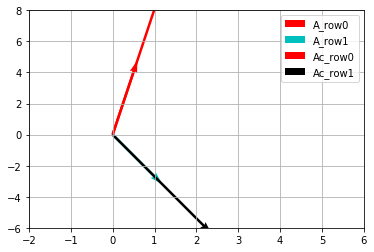

In [168]:
# Change this scalar and see how it scales the vectors
c = 2
Ac = A*c
print(Ac)
plot_2d_vectors([A[0], A[1], Ac[0], Ac[1]], labels=['A_row0', 'A_row1', 'Ac_row0', 'Ac_row1'])

Complete the vector addition below using numpy, plot the first row vector in A, B, and A+B

$$
{\displaystyle A + B = {\begin{pmatrix}1&3\\2&-2\end{pmatrix}} + {\begin{pmatrix}1&0\\0&-1\end{pmatrix}} = {\begin{pmatrix}1+1&3+0\\2+0&-2+-1\end{pmatrix}} = ?}
$$

In [174]:
B = np.array([[1, 0],
              [0, -1]])
B

array([[ 1,  0],
       [ 0, -1]])

In [175]:
AB_sum = A+B
AB_sum

array([[ 2,  3],
       [ 2, -3]])

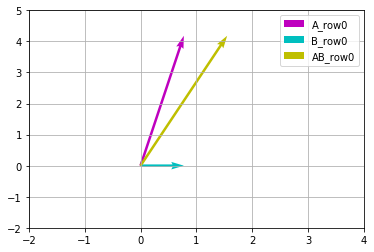

In [176]:
plot_2d_vectors([A[0], B[0], AB_sum[0]], labels=['A_row0', 'B_row0', 'AB_row0'])

## Understanding Linearity and Linear Combinations

* Linearity, linear transformations
* Linear dependence / independence
* Span
* Basis

### Learning Material

Watch the videos to understand and visualize the concepts then make sure you understand the following key points.

**Key Points from the Video**

* Anytime you are adding or scaling vectors you are performing **linear transformations**.
* The **span** of two given vectors is the set of all possible vectors that you can reach with linear combinations of those to vectors. It forms what you can think of as the plane of those vectors.
* The **basis** of a vector space is a subset of vectors in that are linearly independent and span the vector space
* Two vectors are **linearly dependent** if one can be expressed as a linear combination of the other; ie its linearly dependent if its already in the span of the others
> $\vec{u} = a \vec{v} + b \vec{w}$, where a and b are scalar values
* Two vectors are **linearly independent** if they add a new dimension to the span
* Collections of vectors can be thought of and represented using points on a graph

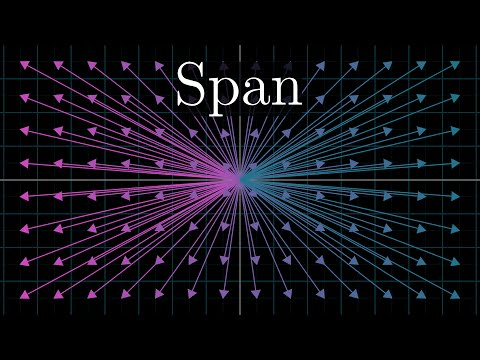

In [183]:
# Span, basis, linearity
YouTubeVideo("k7RM-ot2NWY", width=600, height=350, start=0)

**Key Points from the Video**

* Linear transformations are transformations in which 1) the gridllines remain parallel and evenly spaced and 2) origin remains fixed
* Some 

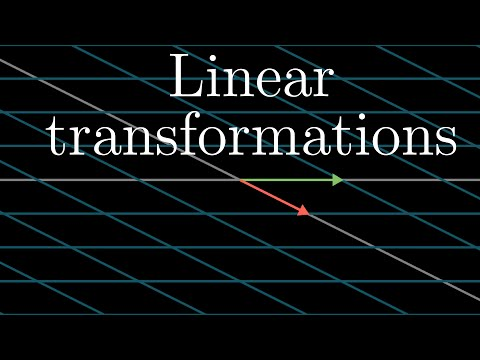

In [182]:
# Linear Transformation
YouTubeVideo("kYB8IZa5AuE", width=600, height=350, start=0)

In [ ]:
# 3D Linear Transformations
YouTubeVideo("rHLEWRxRGiM", width=600, height=350, start=0)

### Exercises and Examples

Determine if the following vectors are linearly dependent or independent.

Determine the span of this vector space

What are the basis vectors for the following

Come up with 2 more vectors that span the vector space described by the vectors below

Write the following equation as a matrix

2i+3j

The following are some examples of linear tranformations

Rotation = 
Reflection
Scaling
Shear

V = -1i + 2j

Show that T(V) = -1(T(i)) + 2(T(j))

Solve this system of equations

-2x + 3y
3x + -2y

## Matrices as Linear Transformations

### Learning Material

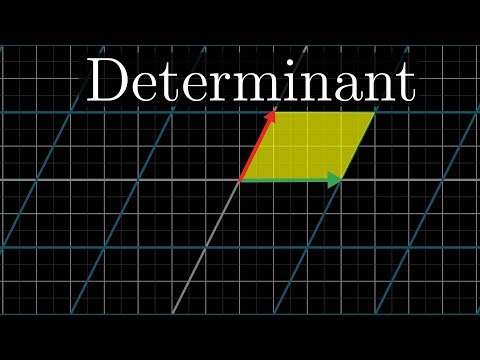

In [184]:
# Determinant
YouTubeVideo("Ip3X9LOh2dk", width=600, height=350, start=0)

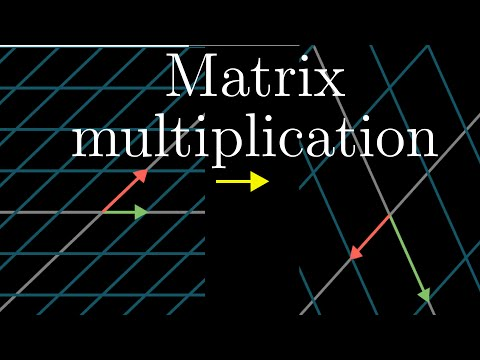

In [180]:
# Matrix multiplication
YouTubeVideo("XkY2DOUCWMU", width=600, height=350, start=0)

In [ ]:
# Inverse Matrices
YouTubeVideo("uQhTuRlWMxw", width=600, height=350, start=0)

**Orthogonal**

Orthogonal vectors are vectors that are at right angles from each other; it then follows that they are linearly independent.

**Orthonormal**

Orthonormal vectors are orthogonal and normalized (ie unit vectors)

**Dimensionality**
Dimensionality may seem straight forward but sometimes it can get confusing in numpy...

## Understanding Linearity

We frequenly talk about linearity and linear transformations...but what does this mean how do we know and why is it important?

In [55]:
# Dimensionality

V0 = np.array([1, 2])  # 1D array
V1 = np.array([[1, 2]])  # 2D array (1 row, 2 columns)
V2 = np.array([[1], [2]])  # 2D array (1 rows, 2 column)

print('V0\nDims: {}\nShape:{}\n {}'.format(V0.ndim, V0.shape, V0))
print('V0\nDims: {}\nShape:{}\n {}'.format(V1.ndim, V1.shape, V1))
print('V0\nDims: {}\nShape:{}\n {}'.format(V2.ndim, V2.shape, V2))

V0
Dims: 1
Shape:(2,)
 [1 2]
V0
Dims: 2
Shape:(1, 2)
 [[1 2]]
V0
Dims: 2
Shape:(2, 1)
 [[1]
 [2]]


#### Linear Dependence and Independence

A set of vectors are **linearly dependent** if at least one of the vectors in the set can be defined as a **linear combination of the others**; otherwise its **linearly independent**.

We can think of linear independence as the minimum number of vectors that are needed to describe a space (or space).

In the case of 1 dimension, we only need one vector to describe the space fully. Every other vector in 1D space can be defined as a linear combination of that vector.

Take this example below. The vectors shown are linearly dependent because they can be expressed as a linear combination of the other ($V2$ is $V$ times 2).

[[1 0]]
[[2 0]]


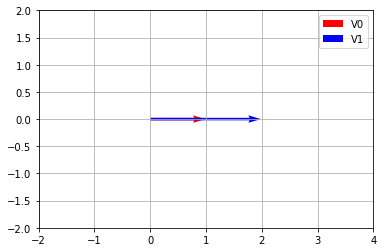

In [24]:
V0 = np.array([[1, 0]])
print(V0)

V1 = V0*2
print(V1)

plot_2d_vectors([V0[0], V1[0]], colors=['r', 'b'])

In [42]:
print(V0.ndim)
print(V0.shape)

2
(1, 2)


In 2D space, the standard basis (called i and j or x and y respectively) are linearly independent. Every other vector in the the xy vector space can be described as some linear combination of those two.

In [25]:
# TODO

In [17]:
np.linalg.det(np.array([[1, 0],
                        [0, 1]]))

1.0

#### Linear Transformations

If we think of the set of vectors in a vector space as a grid of points. A linear transformation is one that

1) keeps the origin fixed and 

2) keeps all gridlines parallen and evenly spaced

More formally, linear transformations follow these rules

T(u+v) = T(u) + T(v)
T(cu) = cT(u)

Below are some examples of linear and non-linear transformations. are **linear transformations** that we can perform on a matrix (eg rotation, scaling, reflection, etc) that will preserve its linearity.

The following operations preserve linearity of the vector ${\displaystyle V={\begin{bmatrix}x&y\end{bmatrix}}}$, where $x$ and $y$ are both integers

In [34]:
# M = np.mgrid?

Dim: 2
Shape: (1, 2)
[[2 2]]


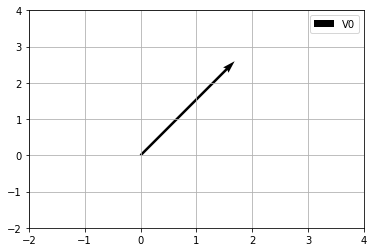

In [25]:
# Linear transformations of gridspace

# Rotation
t_rotation = np.array([[0, 1],
                       [1, 0]])

# Reflection
t_reflection = np.array([[1, 0],
                         [0, -1]])

# Scaling
t_scaling = 3*np.eye((2, 2))

# Shear
t_shear = np.array([[1, 1],
                    [0, 1]])

In [ ]:
# None-Linear transformations of gridspace

# Sine
# t_sin = sin(M)

Because we can easily visualize 1D, 2D and 3D matrices its easy to see visually when linearity is preserved. But for larger matrices we need math to help us out. 

We'll learn more about this later but tow matrices are linearly independent if their dot product is 0. Let's check.

In [312]:
# Are all of our matrices above linearly independent?
print(V.dot(V1))
print(V.dot(V2))
print(V.dot(V3))

4.5

Yes! Great, now lets check for a bigger matrix we cannot visually check.

In [ ]:
# Define matrix
M = np.array([[2, 3],
              [1, 4]])

# Test vector addition
M1 = M+np.full()

# Test scalar multiplication
M2 = M*3

print(np.dot(M, M1))
print(np.dot(M, M2))

## Matrix Math

The arithmetic operations that we are all familiar with can be applied to matrices.

### Addition and Subtraction

Two vectors V1 and V2 at 90 degrees (pi/2) from each other.

In [18]:
# Define perpendicular vectors V1 and V2
V1 = np.array([2, 0])
V2 = np.array([0, 3])

Vector plot V1 ([2 0]) and V2 ([0 3])


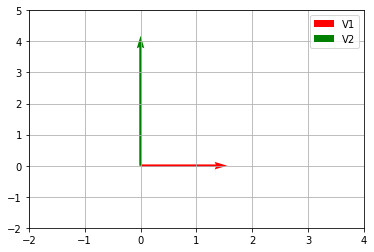

In [19]:
# Visualize them
print('Vector plot V1 ({}) and V2 ({})'.format(V1, V2))
plot_2d_vectors(vectors=[V1, V2], labels=['V1', 'V2'], colors=['r', 'g'])

Vector addition

In [20]:
# Add V1 and V2
V_add = V1+V2
V_add

array([2, 3])

Vector plot V1 ([2 0]) + V2 ([0 3]) = V_add ([2 3])


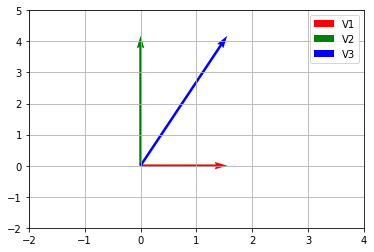

In [22]:
# Visualize them
print('Vector plot V1 ({}) + V2 ({}) = V_add ({})'.format(V1, V2, V_add))
plot_2d_vectors([V1, V2, V_add], labels=['V1', 'V2', 'V_add'], colors=['r', 'g', 'b'])

In [23]:
# Subtract V1 and V2
V_sub = V1-V2

Vector plot V1 ([2 0]) - V2 ([0 3]) = V_sub ([ 2 -3])


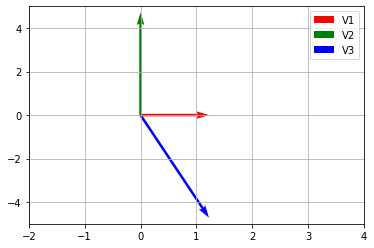

In [24]:
# Visualize them
print('Vector plot V1 ({}) - V2 ({}) = V_sub ({})'.format(V1, V2, V_sub))
plot_2d_vectors([V1, V2, V_sub], labels=['V1', 'V2', 'V_sub'], colors=['r', 'g', 'b'])

We can visualize 3D vectors and their operations too.

In [80]:
# 3D Vectors
V1 = np.array([2, 0, 0])
V2 = np.array([0, 0, 3])
V_add = V1+V2
V_sub = V1-V2

Vector plot V1 ([2 0 0]), V2 ([0 0 3]), V_add ([2 0 3]), V_sub ([ 2  0 -3])
xlim: 0, 2
ylim: 0, 0
zlim: -3, 3


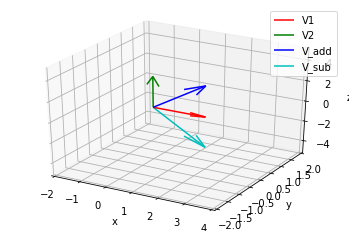

In [81]:
# Visualize them
print('Vector plot V1 ({}), V2 ({}), V_add ({}), V_sub ({})'.format(V1, V2, V_add, V_sub))
plot_3d_vectors([V1, V2, V_add, V_sub], labels=['V1', 'V2', 'V_add', 'V_sub'], colors=['r', 'g', 'b', 'c'])

For higher order matrices, we can just check their element-wise results

In [35]:
M1 = np.ones((10, 10))
M1

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [38]:
M2 = np.full((10, 10), 8)
M2

array([[8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]])

In [39]:
M2-M1

array([[7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.]])

Note: Numpy has a feature called broadcasting in which if you try and perform operations on a matrix in which the dimensions are different, the single matrix column will be broadcast across each column of the other. More on broadcasting later...for now just know that it exists.

In [45]:
M2 = np.full((10, 1), 8)
M2

array([[8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8]])

In [47]:
M2-M1

array([[7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.]])

## Properties of Matrices

* Transpose, Identity, Determinant, Inverse
* Cross Product, Dot Product
* Eigenvalues and Eigenvectors

### Transpose and Identity

The **transpose** ${\displaystyle \mathbf {A} ^{\operatorname {T} }}$ of a matrix ${\displaystyle \mathbf {A} }$ can be obtained by reflecting the elements along its main diagonal.

An **identity** matrix ${\displaystyle \mathbf {I} }$ is a square matrix with 1s along the diagonal and 0s everywhere else.

Important Properties
* ${\displaystyle IA=AI=A}$, multiply the identity matrix by a vector and its doesn't do anything
* A matrix is **symetric** if ${\displaystyle \mathbf {A} ^{\operatorname {T} }=\mathbf {A} .}$

#### Transpose

$$
{\displaystyle {\begin{bmatrix}1&2\end{bmatrix}}^{\operatorname {T} }=\,{\begin{bmatrix}1\\2\end{bmatrix}}}
$$

In [12]:
B = np.array([[1, 2]])
print(B)
print(np.transpose(B))

[[1 2]]
[[1]
 [2]]


<img src="img/Matrix_transpose.gif" alt="matrix transpose" width="100"/>

In [74]:
A = np.array([[1, 2],
              [3, 4],
              [5, 6]
             ])
print(A)
print(np.transpose(A))

[[1 2]
 [3 4]
 [5 6]]
[[1 3 5]
 [2 4 6]]


#### Identity

In [86]:
I = np.eye(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

xlim: 0, 1.0
ylim: 0, 1.0
zlim: 0, 1.0


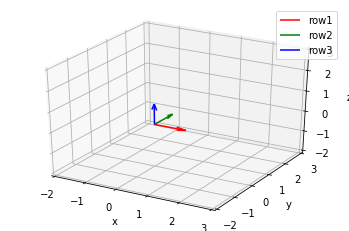

In [87]:
plot_3d_vectors(vectors=I, labels=['row1', 'row2', 'row3'], colors=['r', 'g', 'b'])

#### Properties

${\displaystyle IA=AI=A}$, multiply the identity matrix by a vector and its doesn't do anything

In [105]:
# Define A and A_transpose
A = np.array([[1, 2],
              [3, 4]])
A_t = np.transpose(A)

print(A)
print(A_t)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [93]:
# Define identity matrix of same dimensions of A
A_i = np.eye(A.ndim)
A_i

array([[1., 0.],
       [0., 1.]])

In [94]:
# A times A_transpose = I
np.dot(A, A_t)

array([[ 5, 11],
       [11, 25]])

In [99]:
# AI = IA = A
print(A == np.dot(A, A_i))
print(A == np.dot(A_i, A))

[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]


A matrix is **symetric** if ${\displaystyle \mathbf {A} ^{\operatorname {T} }=\mathbf {A} .}$

In [106]:
# Symmetric = S_transpose = S
S = np.array([[1, 7, 3],
              [7, 4, -5],
              [3, -5, 6]])
S == S.T

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### Determinant and Inverse

The **determinant** of a matrix is a scalar number that can be calculated from a square matrix.

The **inverse** of ${\displaystyle \mathbf {A} }$, ${\displaystyle \mathbf {A} ^{\operatorname {-1} }}$ exists only when the product of the two is ${\displaystyle \mathbf {I} }$ (the identity matrix).

Important Properties
* ${\displaystyle \det (A) = 0}$, det is 0 if matrix $A$ is not invertible
* ${\displaystyle \det (I) = 1}$, determinant of identity matrix is 1
* ${\displaystyle \det (A^{T}) = \det (A)}$, determinant of $A^{T}$ is the same as the determinant of $A$
* ${\displaystyle \det (I) = 1}$, determinant of identity matrix is 1
* ${\displaystyle \det (A^{-1}) = [\det (A)]^{-1}}$
* ${\displaystyle \det (AB) = \det (A) \det (B)}$, for square matrices of equal size 

#### Determinant

Geometrically, the determinant can be thought of as the [scaling factor of the linear transformation described by the matrix](https://www.youtube.com/watch?v=Ip3X9LOh2dk&vl=en).

It is calculated using this formula:
${\displaystyle {\begin{aligned}|A|={\begin{vmatrix}a&b\\c&d\end{vmatrix}}=ad-bc.\end{aligned}}}$

The determinant of larger matrices is just the sum of the determinant of the smaller matrices.

<img width="500" src="img/determinant.svg"></img>

[Source](https://en.wikipedia.org/wiki/Determinant)

Luckily, we can let the computer calculate this for us....but we need to have a firm grasp on what it means.

In [88]:
A = np.array([[1, 1],[0, 1]])
A_det = np.linalg.det(A)
print(A)
print(A_det)

[[1 1]
 [0 1]]
1.0


In [92]:
B = np.array([[3, 0],[0, 2]])
print(B)
print(np.linalg.det(B))

[[3 0]
 [0 2]]
6.0


#### Inverse

#### Compute the inverse

Say we have a matrix

${\displaystyle \mathbf {A} ={\begin{pmatrix}4&7\\2&6\end{pmatrix}}}$

In [48]:
A = np.array([[4, 7],[2,6]])
print(A)

[[4 7]
 [2 6]]


And calculate its inverse

${\displaystyle \mathbf {B} ={\begin{pmatrix}.6&-.7\\-.2&.4\end{pmatrix}}}$

In [51]:
B = np.linalg.inv(A)
print(B)

[[ 0.6 -0.7]
 [-0.2  0.4]]


We can verify that A and B are inverses by checking their product is the identity matrix.

${\displaystyle \mathbf {I} ={\begin{pmatrix}1&0\\0&1\end{pmatrix}}}$

In [50]:
print(np.matmul(A, B).astype(int))
print(np.matmul(B, A).astype(int))

[[1 0]
 [0 1]]
[[1 0]
 [0 1]]


#### Properties

If the **determinant of M != 0**

In [53]:
# Det NOT equal 0 => inverse exists
A = np.array([[4, 7],[2, 6]])
np.linalg.det(A)

10.000000000000002

In [54]:
# inverse exists
np.linalg.inv(A)

array([[ 0.6, -0.7],
       [-0.2,  0.4]])

**If the determinant of $M$ (an $n x n$ matrix) is 0**
* no inverse exists
* rows and columns are dependent

In [112]:
M = np.array([[1, 2, 3],
              [2, 4, 6],
              [4, 8, 12]])
print(M)
print(np.linalg.det(M))

[[ 1  2  3]
 [ 2  4  6]
 [ 4  8 12]]
0.0


In [115]:
# Will throw error
# No inverse exists; its a singular matrix
# print(np.linalg.inv(M))

The determinant of $A^{T}$ is the same as the determinant of $A$

${\displaystyle \det (A^{T}) = \det (A)}$

In [119]:
np.linalg.det(A) == np.linalg.det(A.T)

False

In [118]:
np.linalg.det(M) == np.linalg.det(M.T)

True

The determinant of the identity matrix is 1

${\displaystyle \det (I) = 1}$

In [122]:
np.linalg.det(np.eye(10))

1.0

The determinant is distributable

${\displaystyle \det (A^{-1}) = [\det (A)]^{-1}}$

${\displaystyle \det (AB) = \det (A) \det (B)}$, if A and B are square matrices of equal size

In [123]:
np.linalg.det(A_inv) == np.linalg.inv(np.linalg.det(A))

NameError: name 'A_inv' is not defined

### Cross Products and Dot Products

The **cross product** `a × b` is defined as a vector `c` that is perpendicular (orthogonal) to both `a` and `b`.

The **dot product** (or scalar product) `a · b` takes to matricies and gives a single scalar number.

#### Cross Product

It will also has a direction given by the right-hand rule and a magnitude **equal to the area of the parallelogram** that the vectors span.

![matrix_network](img/vector_cross_product.png)

**Starting with a 2D example to make visualization easier**

In Python, we create the above image by defining a and b, then c as the cross product between the two.

In [114]:
# Define vector a and vector b
a = np.array([[2, 3]])
b = np.array([[1, -3]])

# Compute their cross product and assign it to c
c = np.cross(a,b)

print('vectors a, b, and c: {}, {}, {}'.format(a, b, c))

vectors a, b, and c: [[2 3]], [[ 1 -3]], [-9]


In [115]:
# Print out the shape (ie dimensions) of a, b, and c
print('Dimension of vector a is {} (shape {})'.format(a.ndim, a.shape))
print('Dimension of vector b is {} (shape {})'.format(b.ndim, b.shape))
print('Dimension of vector c is {} (shape {})'.format(c.ndim, c.shape))

Dimension of vector a is 2 (shape (1, 2))
Dimension of vector b is 2 (shape (1, 2))
Dimension of vector c is 1 (shape (1,))


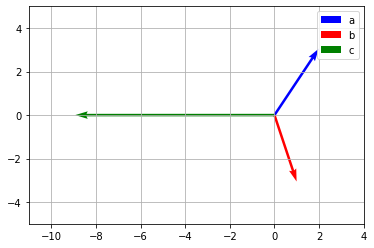

In [116]:
plot_2d_vectors(vectors=[[2, 3], [1, -3], [-9, 0]], labels=['a', 'b', 'c'], colors=['b', 'r', 'g'])

#### Dot Product

You can take the dot product of any two matricies that share the inner dimension.

To multiply two vectors it makes sense to multiply their lengths together but only when they point in the same direction, so we only use the component that is pointed in the same direction (ie. cos(theta))

a · b = |a| × |b| × cos(θ)

a · b = |a| × |b| × cos(90°)
a · b = |a| × |b| × 0
a · b = 0
or we can calculate it this way:

a · b = ax × bx + ay × by

a · b = -12 × 12 + 16 × 9
a · b = -144 + 144
a · b = 0

Algebraically the dot product is the sum of products:

$$
{\displaystyle {\begin{bmatrix}\color {red}1&\color {red}3&\color {red}-5\end{bmatrix}}{\begin{bmatrix}\color {blue}4\\\color {blue}-2\\\color {blue}-1\end{bmatrix}}=\color {purple}3}.
$$

Geometrically, the dot product is the magnitude of the vectors cos the angle between them or ${\displaystyle \mathbf {a} \cdot \mathbf {b} =\|\mathbf {a} \|\ \|\mathbf {b} \|\cos \theta ,}$. Geometrically it looks like this:

<img src="img/scalar_projection.png" alt="scalar projection" width="200"/>

We will use these vectors in the examples that follow

In [123]:
d = np.array([[2, 3]]); print(d.shape, d.ndim)
e = np.array([[1], [5]]); print(e.shape, e.ndim)
f = np.array([[1], [3], [-5]]); print(f.shape, f.ndim)
g = np.array([[4, -2, -1]]); print(g.shape, g.ndim)

(1, 2) 2
(2, 1) 2
(3, 1) 2
(1, 3) 2


You see we can get the dot product of the `(1x2)` and `(2x1)` matrix because they share the inner dimension `2`

In [120]:
d_dot_e = np.dot(d,e); print('d dot e: {}'.format(d_dot_e))
f_dot_g = np.dot(f,g); print('g dot g: {}'.format(f_dot_g))
e_dot_g = np.dot(e,g); print('e dot g: {}'.format(e_dot_g))

d dot e: [[17]]
g dot g: [[  4  -2  -1]
 [ 12  -6  -3]
 [-20  10   5]]
e dot g: [[  4  -2  -1]
 [ 20 -10  -5]]


In the example below we can see that the dot product of two perpendicular vectors is 0.

In [121]:
# Dot product of orthogonal vectors is 0
a = np.array([-12, 16])
b = np.array([12,9])
c = np.dot(a,b);c

0

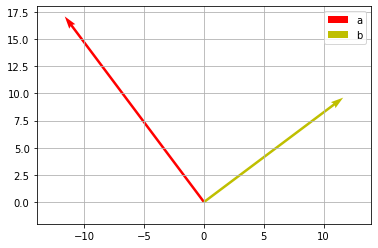

In [129]:
plot_2d_vectors([a, b], labels=['a', 'b'])

But not the `3x1` and `2x1` because they don't share an inner dimension (1 ne 2)

In [131]:
np.dot(e,f)

ValueError: shapes (2,1) and (3,1) not aligned: 1 (dim 1) != 3 (dim 0)

In [132]:
# Print out the shape (ie dimensions) of e, f
print('Dimension of vector e is {} (shape {})'.format(e.ndim, e.shape))
print('Dimension of vector f is {} (shape {})'.format(f.ndim, f.shape))

Dimension of vector e is 2 (shape (2, 1))
Dimension of vector f is 2 (shape (3, 1))


## Eigenvalues and Eigenvectors

`v` is an eigenvector of a square matrix `A` if it stretches but doesn't change the direction of `A`; the eigenvalue ($\lambda$) is the scaling factor.

More formally, we can say that if you multiply a matrix, `A` by an eigenvector, `v`, then the vector `Av` will be a number (scalar) times the original `v`.

$$
{\displaystyle A\mathbf {v} =\lambda \mathbf {v}}
$$

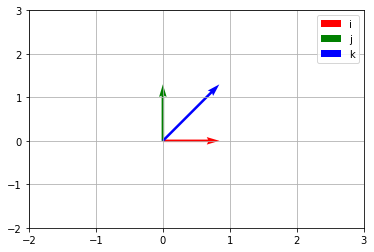

In [128]:
# See that ...
i = [1, 0]
j = [0, 1]
plot_2d_vectors(vectors=[i, j, k], labels=['i', 'j', 'k'], colors=['r', 'g', 'b'])

In [129]:
eig_vals, eig_vects = np.linalg.eig([i, j, k])
print(eig_vals)
print(eig_vects)

LinAlgError: Last 2 dimensions of the array must be square

Let's take the matrix ${\displaystyle A={\begin{bmatrix}2&1\\1&2\end{bmatrix}}}$ and calculate its eigenvalues and eigenvectors.

For example, we have a matrix ${\displaystyle A={\begin{bmatrix}2&1\\1&2\end{bmatrix}}}$

In [201]:
A = np.array([[2, 1], [1, 2]])
A

array([[2, 1],
       [1, 2]])

In [ ]:
eig_vals, eig_vects = np.linalg.eig([[1, 1], [1, 1]])
print(eig_vals)
print(eig_vects)

Let the computer calculate the eigenvalues and vectors

In [202]:
eig_vals, eig_vects = np.linalg.eig(A)
print(eig_vals)
print(eig_vects)

[3. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


But let prove to ourselves that the calculations are correct. To do that, we need to prove that $A\mathbf {v} =\lambda \mathbf {v}$ or the matrix times the eigenvector is equal to some scaing factor lambda times that eigenvector.

First let's rearrange the equation

$$
A v=\lambda v
$$

move everything to one side of the equation

$$
A v - \lambda v = 0
$$

factor out the eigenvector $v$

$$
(A-\lambda I)v=0
$$

we know $v$ isn't the zero vector so that leaves the other part of the equation that must equal 0

$$
{\displaystyle |A-\lambda I|={\begin{vmatrix}2-\lambda &1\\1&2-\lambda \end{vmatrix}}=3-4\lambda +\lambda ^{2}}
$$


Let start with the first eigenvalue $\lambda = 3$ then calculate the determinant of $A - \lambda I$ or as its commonly written $|A-\lambda I|$

$$
{\displaystyle |A-\lambda I|={\begin{vmatrix}2-\lambda &1\\1&2-\lambda \end{vmatrix}}=3-4\lambda +\lambda ^{2}}
$$

$$
{\displaystyle |A-3I|=3-4(3) + 3^{2} = 0}
$$

In [151]:
# Prove the 1st eigenvalue (eig_vals[0]) is an eigenvalue
I = np.eye(2, 2)
np.linalg.det(A-(eig_vals[0]*I))

0.0

In [152]:
# Prove the 2nd eigenvalue (eig_vals[1]) is an eigenvalue
I = np.eye(2, 2)
np.linalg.det(A-(eig_vals[1]*I))

0.0

We can double check to make sure that the original vector `A` is a linear combination of the eigenvector scaled by the eigenvalues.

array([[-0.70710678,  0.89442719],
       [ 0.70710678, -1.78885438]])

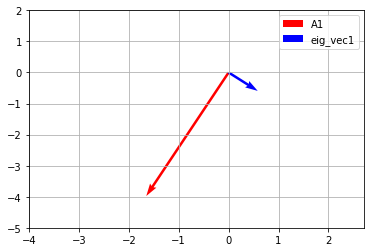

In [139]:
plot_2d_vectors([[-2, -3], eig_vects[0]], labels=['A1', 'eig_vec1'], colors=['r', 'b'])

https://medium.com/fintechexplained/what-are-eigenvalues-and-eigenvectors-a-must-know-concept-for-machine-learning-80d0fd330e47

In [ ]:
# Explain Embeddings here?

# Computational Linear Algebra Considerations

Computational linear algebra calculations on large datasets can be time and memoty intensive, here are some techniques help monitor computational resources.

Optimizing a computer to perform calculations means we need to learn to optimize their memory efficieny and speed. Luckily, libraries take care of most of this for us but it helps to be mindful of what they are doing. In this section we are going to just skim the surface..

Memory Usage Tools

In [ ]:
import psutil

In [ ]:
process = psutil.Process(os.getpid())
t = process.memory_info()

In [ ]:
t.vms, t.rss

In [ ]:
def mem_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / psutil.virtual_memory().total

In [ ]:
mem_usage()

Timing Tools

In [ ]:
%%timeit

## Broadcasting

In order to perform matrix operations quickly matrix libraries use broadcasting in which the calculations are performed more efficiently and in C rather than Python.

### General Broadcasting Rules

NumPy compares array shapes element-wise (starting with the trailing dims)

Two dimensions are compatible when

they are equal, or
one of them is 1

```
Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3
```

When either of the dimensions compared is one, the other is used. In other words, dimensions with size 1 are stretched or “copied” to match the other.

```
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5
```

Element-wise operation for same dims

In [6]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b

array([2., 4., 6.])

Scalar spread across dims

In [7]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b

array([2., 4., 6.])

In [18]:
x = np.arange(4)
print(x)
print(x.shape)

[0 1 2 3]
(4,)


In [19]:
y = np.ones(5)
print(y)
print(y.shape)

[1. 1. 1. 1. 1.]
(5,)


In [17]:
x + y

ValueError: operands could not be broadcast together with shapes (4,) (5,) 

In [21]:
xx = x.reshape(4, 1)
print(xx)
print(xx.shape)

[[0]
 [1]
 [2]
 [3]]
(4, 1)


In [22]:
xx + y

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.]])

In [24]:
z = np.ones((3, 4))
print(z)
print(z.shape)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
(3, 4)


In [25]:
x + z

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

# Practical Applications in Data Science

Using the foundational concepts we just learned, let's dive into practical applications like dimensionality reduction techniques, etc.

## Dimensionality Reduction

Frequently in data science disciplines we will need to **reduce the dimensionality of a matrix**. This means we find an equivalent or close to equivalent representation of it that is smaller (ie. less memory and less time intensive)

There are several methods for dimensionality reduction....

* **Factorization / Decomposition:** We could factor the matrix, or break it down into the product of lower dimensional matrices.
* PCA ...

## Dimensionality Reduction

Frequently data scientists will work with what are called sparse matrices (matrices with lots of zeros). In order to more efficiently store sparse matrices we can store just the non-zero values.

*I highly recoment checking out the Principle Component Analysis Workbook for more details on dimensionality reduction if its relevant to you.*

Some data structures better suited for efficiently working with sparse matrices:

* Dictionary of Keys. A dictionary is used where a row and column index is mapped to a value.

* List of Lists. Each row of the matrix is stored as a list, with each sublist containing the column index and the value.

* Coordinate List. A list of tuples is stored with each tuple containing the row index, column index, and the value.

* Compressed Sparse Row. The sparse matrix is represented using three one-dimensional arrays for the non-zero values, the extents of the rows, and the column indexes.

* Compressed Sparse Column. The same as the Compressed Sparse Row method except the column indices are compressed and read first before the row indices.

In [29]:
from scipy.sparse import csr_matrix

In [30]:
# create dense matrix
A = np.array([[1, 0, 0, 1, 0, 0], [0, 0, 2, 0, 0, 1], [0, 0, 0, 2, 0, 0]])
print(A)

[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]


In [31]:
# convert to sparse matrix (CSR method)
S = csr_matrix(A)
print(S)

  (0, 0)	1
  (0, 3)	1
  (1, 2)	2
  (1, 5)	1
  (2, 3)	2


In [32]:
# reconstruct dense matrix
B = S.todense()
print(B)

[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]


### Clustering

### <span style="color:red;">Singular Value Decomposition (SVD)</span>

In [74]:
M = np.array([[3, 0, 2], [2, 0, -2], [0, 1, 1]])
M

array([[ 3,  0,  2],
       [ 2,  0, -2],
       [ 0,  1,  1]])

In [75]:
U, S, Vtranspose = np.linalg.svd(M)
print(U)
print(S)
print(Vtranspose)

[[-0.95123459  0.23048583 -0.20500982]
 [-0.28736244 -0.90373717  0.31730421]
 [-0.11214087  0.36074286  0.92589903]]
[3.72021075 2.87893436 0.93368567]
[[-0.9215684  -0.03014369 -0.38704398]
 [-0.38764928  0.1253043   0.91325071]
 [ 0.02096953  0.99166032 -0.12716166]]


# Exercises

# Additional Resources

[Linear Algebra Playlist (by 1blue3brown)](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

[Understanding Linearity and Linear Transformations (by Khan Academy)](https://www.khanacademy.org/math/linear-algebra/matrix-transformations/linear-transformations/a/visualizing-linear-transformations)

[Numerical Linear Algebra (by Rachel Thomas, Fastai)](https://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/tree/master/)